In [1]:
from data_wiz import *
from mplfonts.bin.cli import init
from mplfonts import use_font

AttributeError: 'Rectangle' object has no property 'stacked'

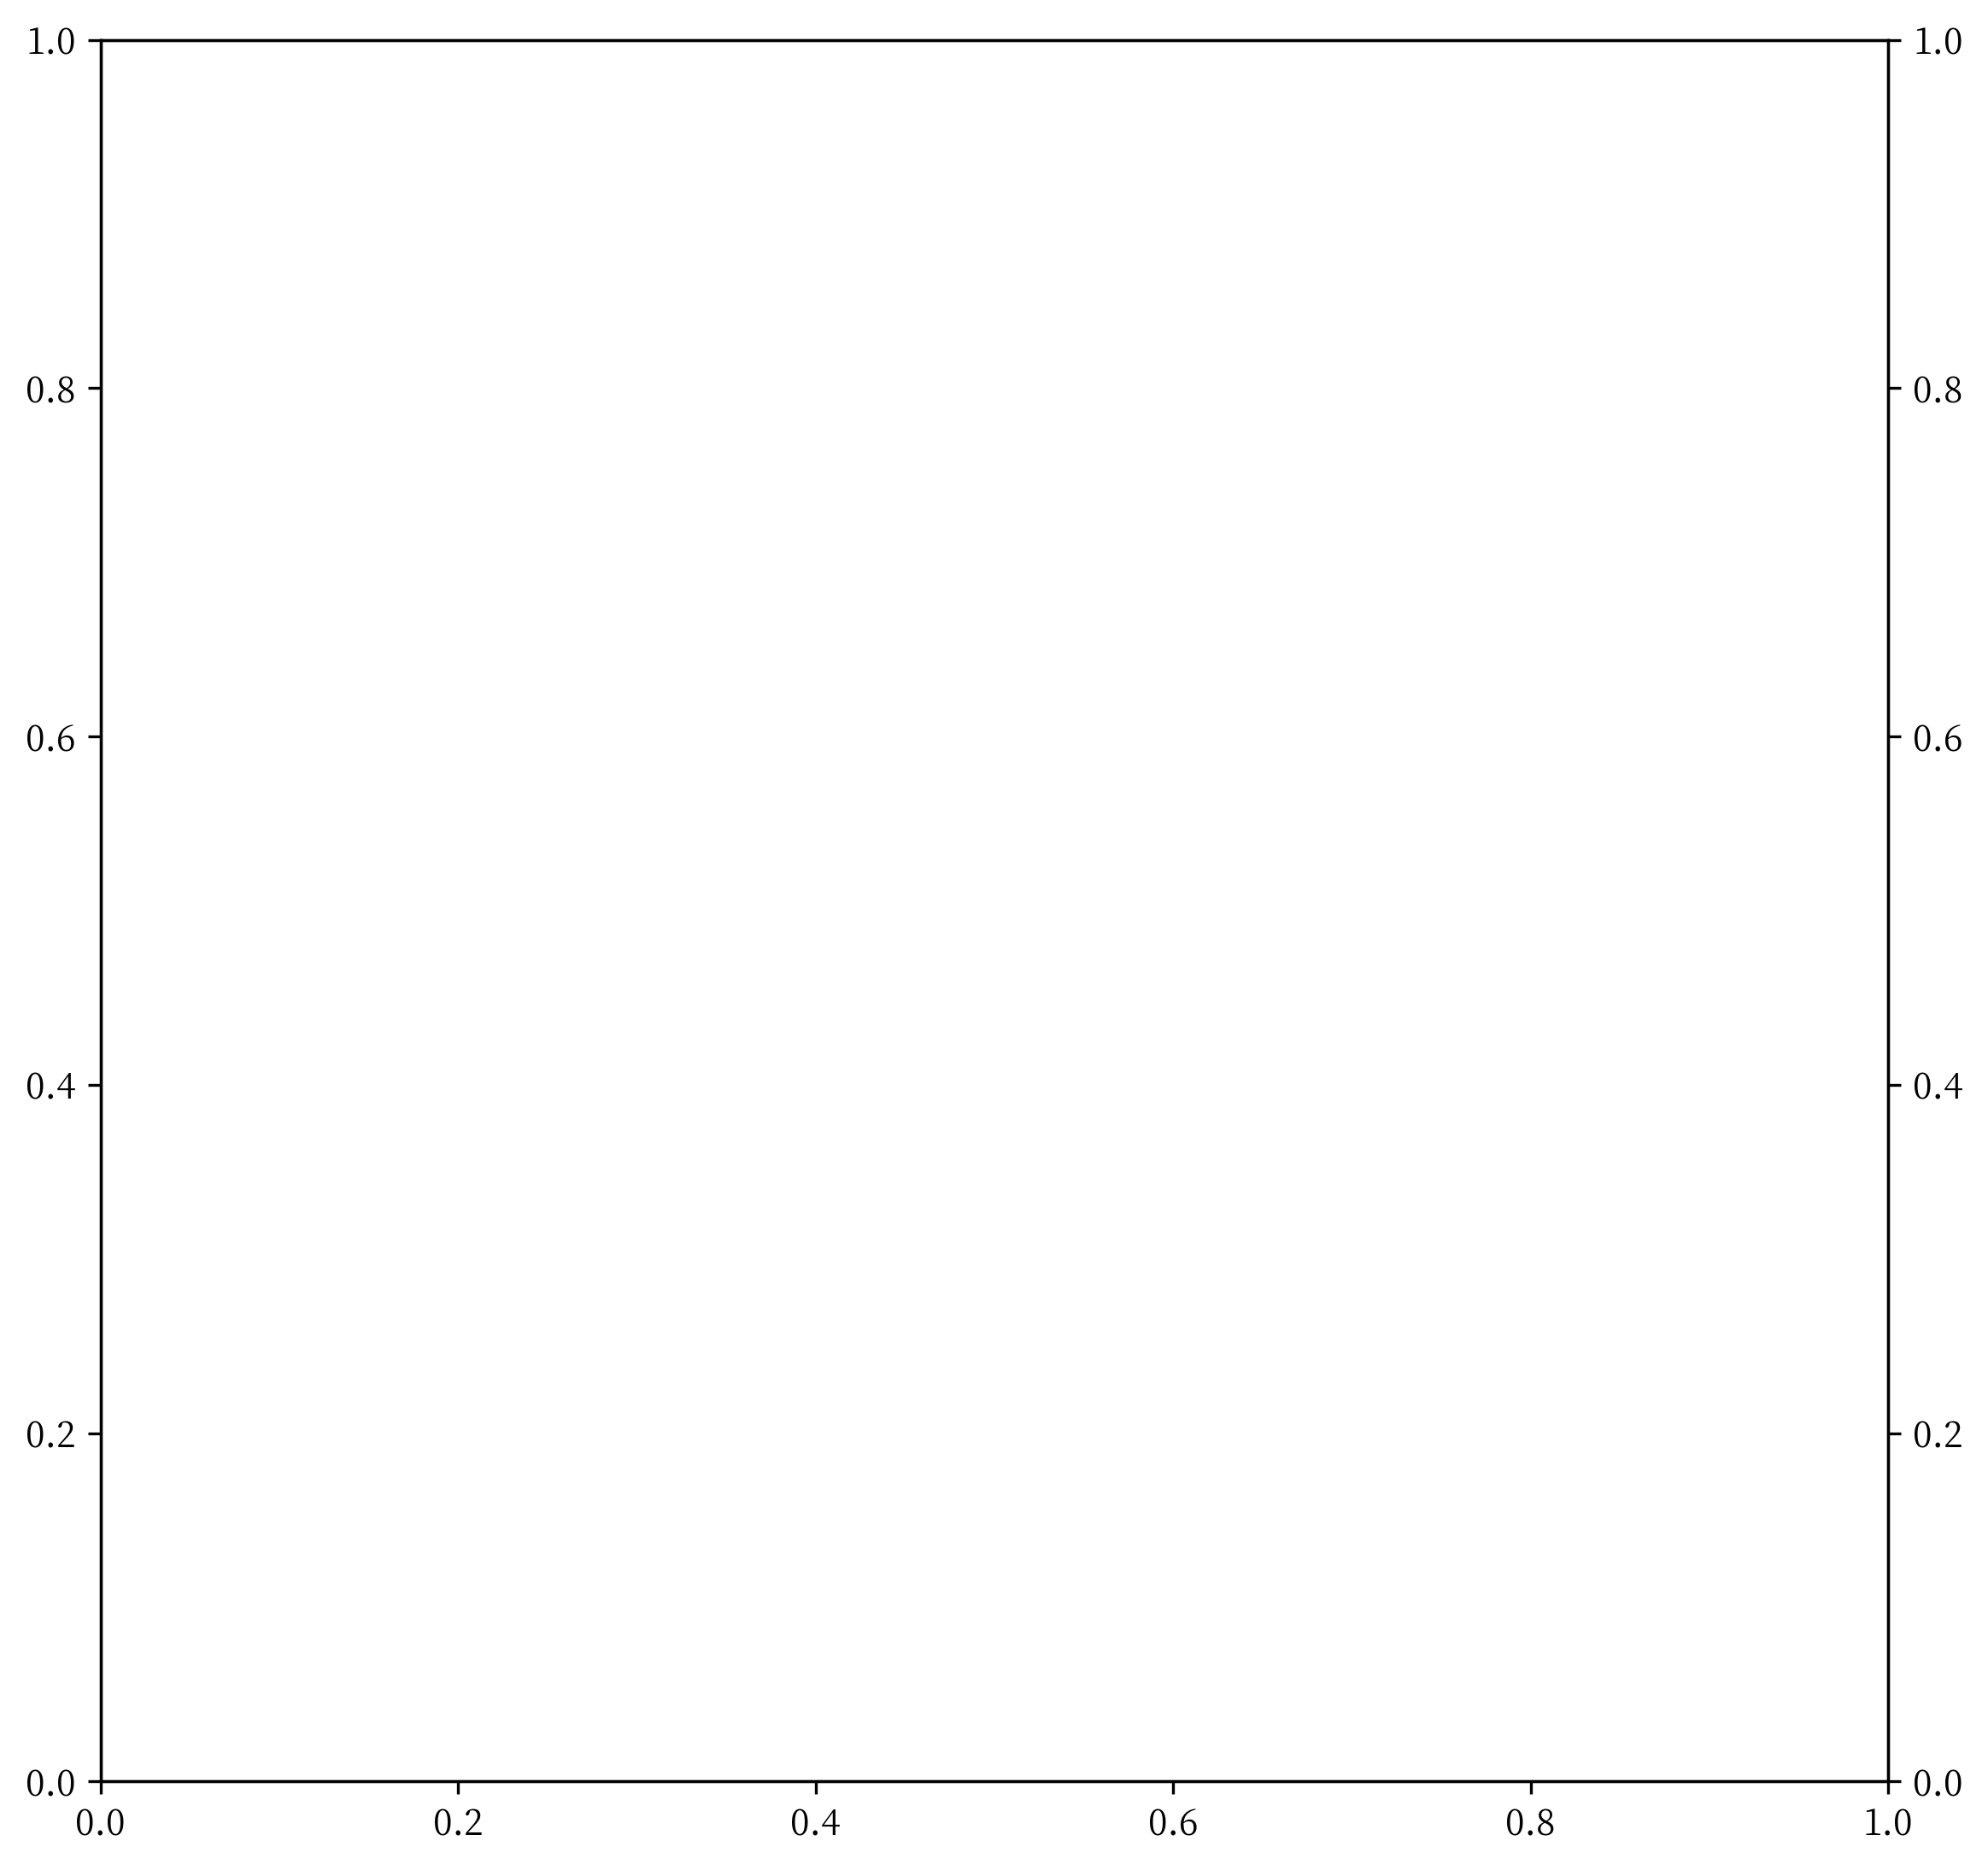

In [2]:
file_index_list = [
    {
        "path": "/Users/zhixuan/PycharmProjects/3e-data-wiz/example-files/情景1产能.xlsx",
        "focused_index": "Installed Power Capacity (MW)",
        "columns": ["Installed Power Capacity (MW)", "Installed Heat Capacity (MW)",
                    "Installed Hydrogen Production Capacity (MW)"]
    },
    {
        "path": "/Users/zhixuan/PycharmProjects/3e-data-wiz/example-files/情景1产量.xlsx",
        "focused_index": "Electricity Generation (GWh)",
        "columns": ["Electricity Generation (GWh)", "Planned Curtailment (GWh)", "Hydrogen Production (MWh)",
                    "Hydrogen Production (10000 Ton)", "Heat Generation (TJ)"]
    }
]

ref = RefData("/Users/zhixuan/PycharmProjects/3e-data-wiz/example-files/color_index.xlsx")
data = WorkingData(file_index_list, ref)

data.rule_out("省份")
data.calc_complex_index('Electricity Generation (GWh)', 'Installed Power Capacity (MW)')

init()
use_font("Source Han Serif SC")
data.draw("Electricity Generation (GWh)", focused_region="Beijing")

In [ ]:
line_df = data.working_df[data.working_df['index'] == "Complex"]
line_df

In [ ]:
line_df['集中式光伏'].plot()

<AxesSubplot:xlabel='年份'>

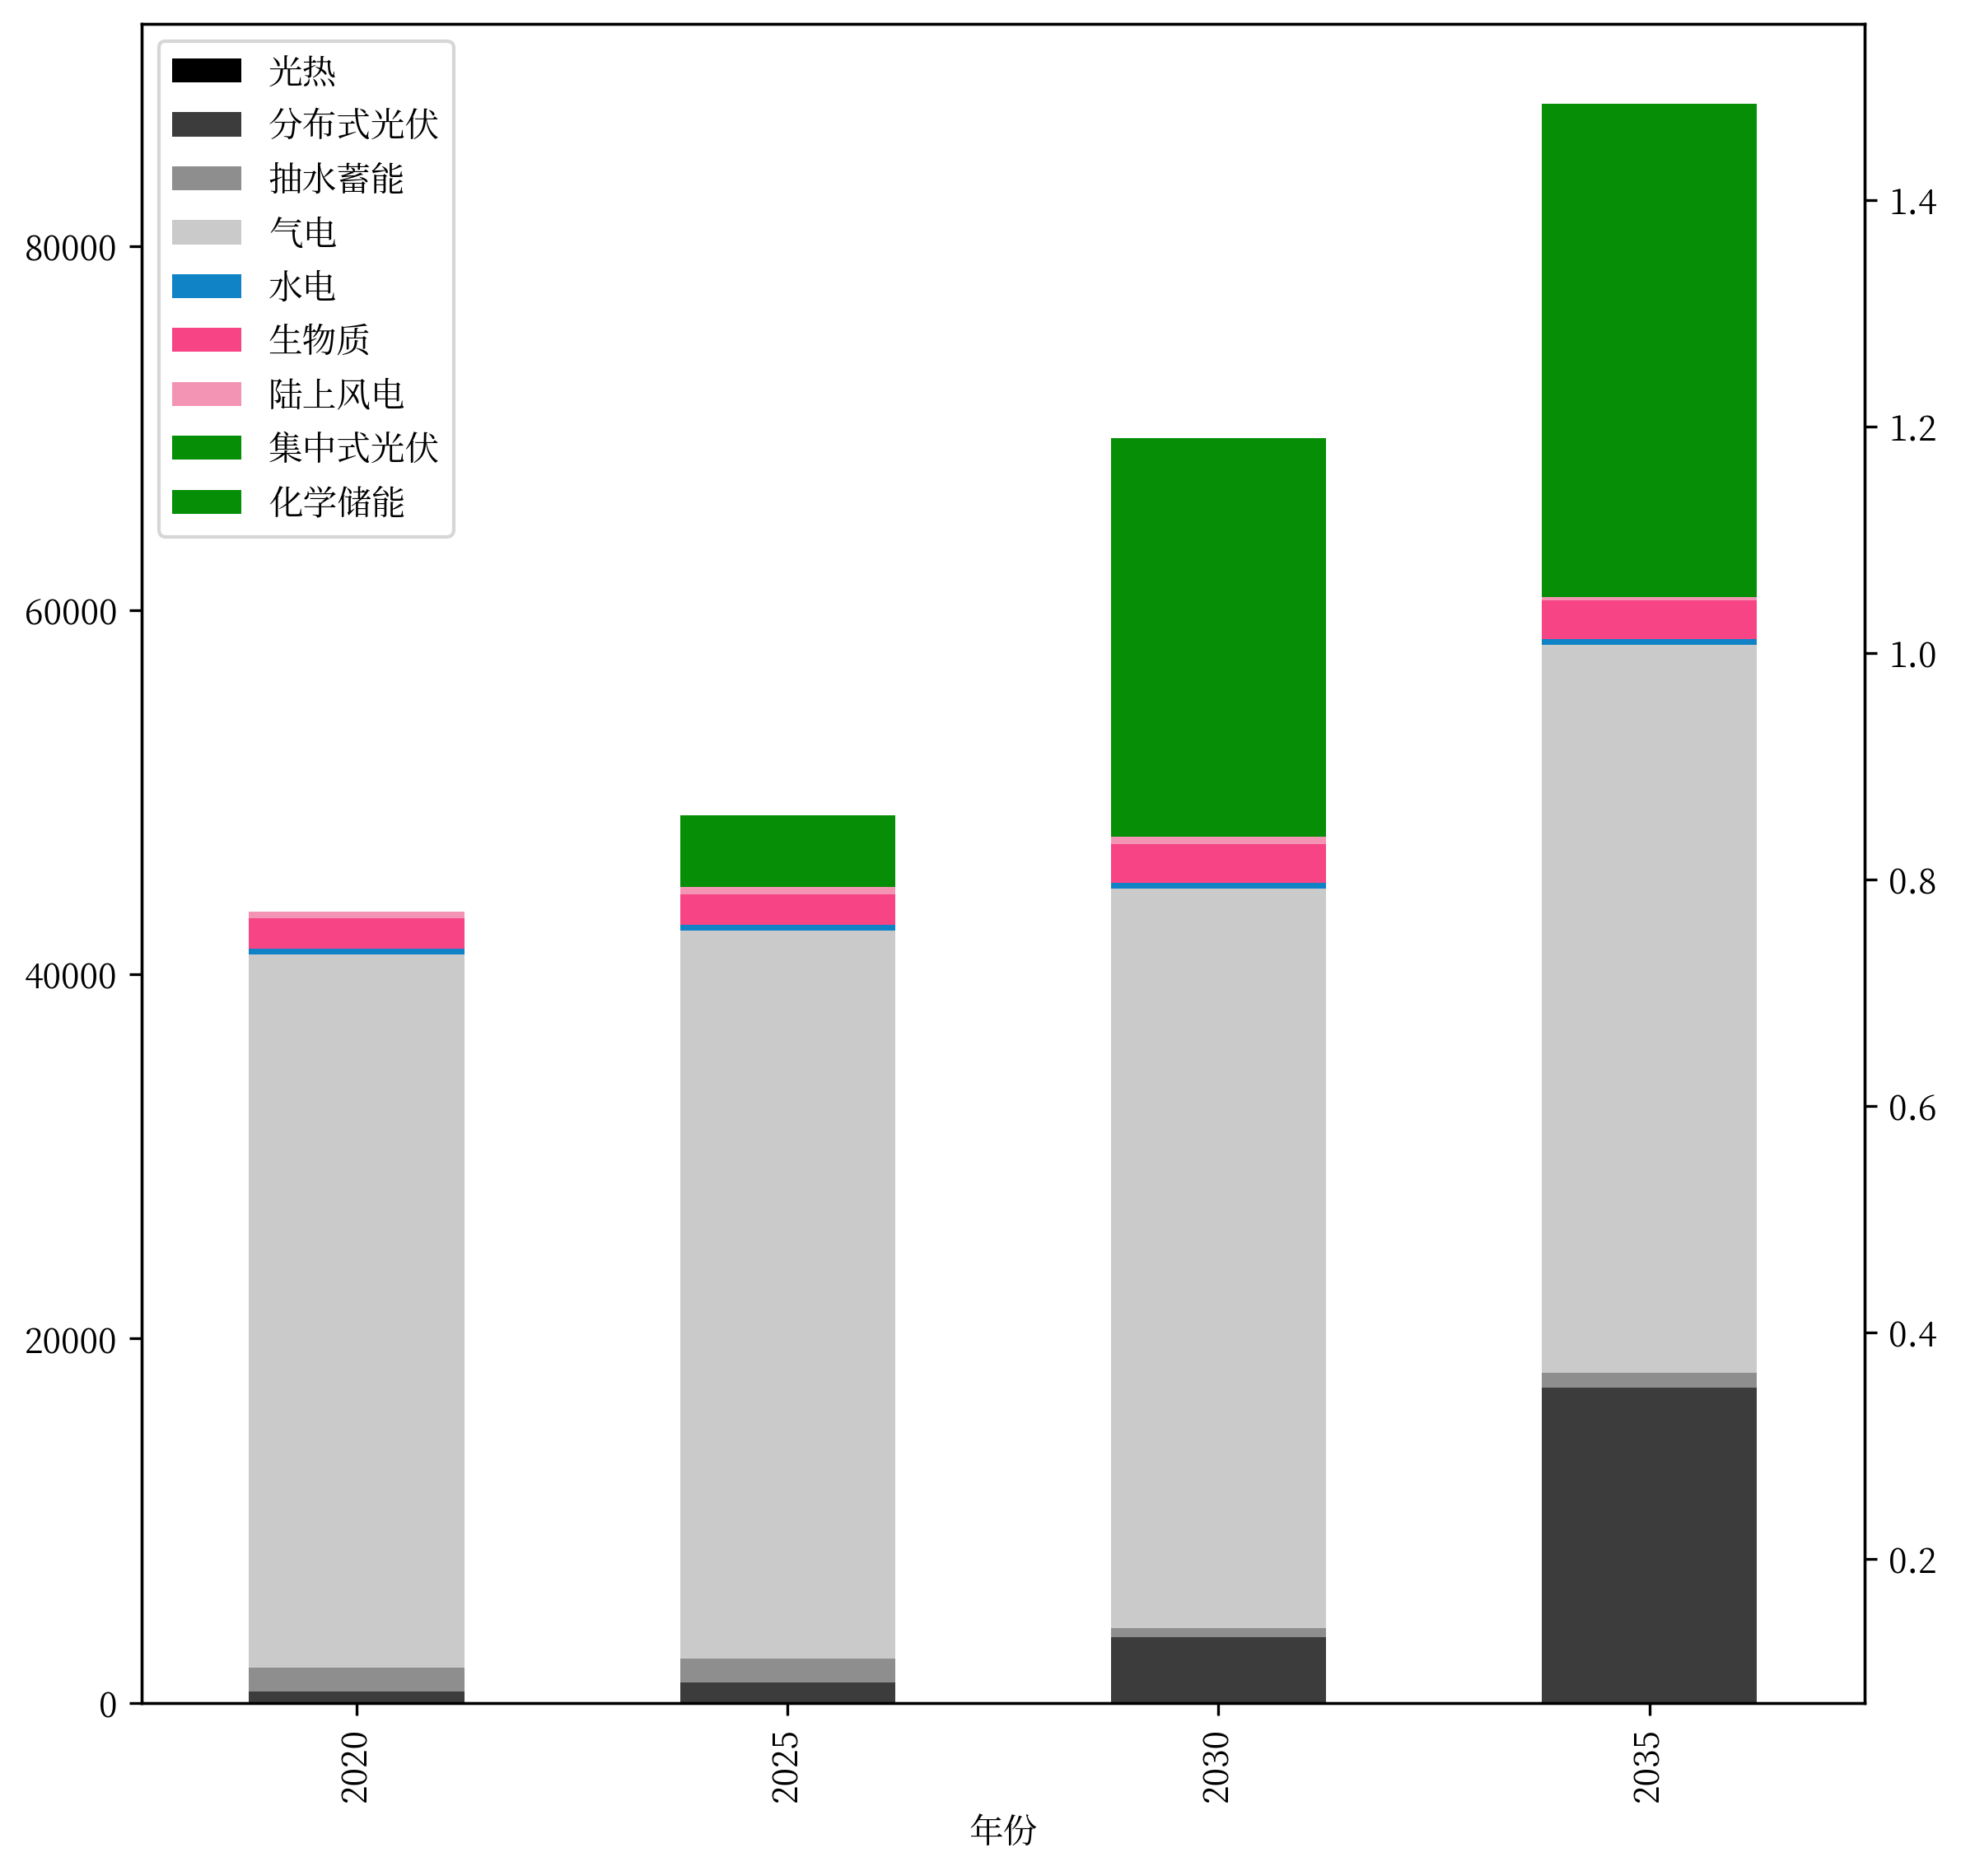

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax2 = ax.twinx()
fig.set_size_inches(9, 9)
fig.set_dpi(300)

# line plot section
line_df = data.working_df[data.working_df['index'] == "Complex"]
# line_df['集中式光伏'].plot(ax=ax2)
ax2.plot(line_df['集中式光伏'])

fig.savefig("./checking_graph0.png", dpi=300)

# bar plot section
bar_df = data.working_df[data.working_df['index'] != 'Complex']
bar_df = bar_df[bar_df['index'] == "Electricity Generation (GWh)"]  # choose the index to plot in bar plot
bar_df.plot(kind='bar', stacked=True,
            color=[data.ref.color_scheme.get(x, '#111111') for x in data.ref.color_scheme], ax=ax)